In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

##This lines bellow were defined for kaggle notebooks, just pass away if you are not using kaggle notebooks for them
##As I am using PyCharm for pushing my works to github I just commented this part, and change test, train cvs file names further in the code
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

**Load the Dataset**

In [2]:
# X = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
X = pd.read_csv('train.csv')
X.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X.shape

(42000, 785)

In [4]:
# X_test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
X_test = pd.read_csv('test.csv')
X_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X_test.shape

(28000, 784)

In [6]:
y = X['label']
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [7]:
X.drop(['label'], axis=1, inplace=True)
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt

**Check a sample image**

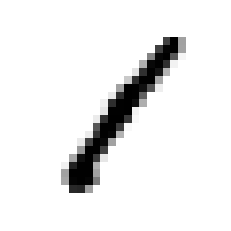

In [9]:
some_digit = np.array(X.iloc[[0]])
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

**Data Augmentation**

*Generate more training data by shifting the given images 1 pixel in up/down/left/right directions to generate 4 more training samples for each input image.*

In [10]:
from scipy.ndimage import interpolation

*Shift 1 pixel down*

In [11]:
X_aug_down = interpolation.shift(np.array(X).reshape(42000,28,28), [0,1,0], cval=0)
X_aug_down.shape

C:\Users\User\AppData\Local\Temp\ipykernel_11168\909831320.py:1: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  X_aug_down = interpolation.shift(np.array(X).reshape(42000,28,28), [0,1,0], cval=0)


(42000, 28, 28)

*Shift 1 pixel up.*

In [12]:
X_aug_up = interpolation.shift(np.array(X).reshape(42000,28,28), [0,-1,0], cval=0)
X_aug_up.shape

C:\Users\User\AppData\Local\Temp\ipykernel_11168\3127684670.py:1: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  X_aug_up = interpolation.shift(np.array(X).reshape(42000,28,28), [0,-1,0], cval=0)


(42000, 28, 28)

*Shift 1 pixel right.*

In [13]:
X_aug_right = interpolation.shift(np.array(X).reshape(42000,28,28), [0,0,1], cval=0)
X_aug_right.shape

C:\Users\User\AppData\Local\Temp\ipykernel_11168\500209655.py:1: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  X_aug_right = interpolation.shift(np.array(X).reshape(42000,28,28), [0,0,1], cval=0)


(42000, 28, 28)

*Shift 1 pixel left.*

In [14]:
X_aug_left = interpolation.shift(np.array(X).reshape(42000,28,28), [0,0,-1], cval=0)
X_aug_left.shape

C:\Users\User\AppData\Local\Temp\ipykernel_11168\1344806210.py:1: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  X_aug_left = interpolation.shift(np.array(X).reshape(42000,28,28), [0,0,-1], cval=0)


(42000, 28, 28)

In [15]:
X_temp = np.concatenate((X_aug_down, X_aug_up, X_aug_right, X_aug_left))
X_temp.shape

(168000, 28, 28)

*Augmented training dataset generated and stored in X_aug and y_aug.*

In [16]:
X_aug = np.concatenate((X, X_temp.reshape(168000, 784)))
X_aug.shape

(210000, 784)

In [17]:
y_aug = np.concatenate((y, y, y, y, y))
y_aug.shape

(210000,)

**Split into Training and Validation Sets**

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X_aug, y_aug, test_size=0.2)

**Training ResNet-34**

In [20]:
import tensorflow as tf
from tensorflow import keras

In [21]:
from functools import partial

*The ***ImageNet Large Scale Visual Recognition Challenge (ILSVRC)*** 2015 challenge was won using a ***Residual Network (or ResNet)***. The key to being able to train such a deep network is to use ***skip connections (also called shortcut connections)***: the signal feeding into a layer is also added to the output of a layer located a bit higher up the stack. If we add the input x to the output of the network (i.e., we add a skip connection), then the network will be forced to model ***f(x) = h(x) - x rather than h(x)***. This is called residual learning.*

*When we initialize a regular neural network, its weights are close to zero, so the network just outputs values close to zero. If we add a skip connection, the resulting network just outputs a copy of its inputs. If the target function is fairly close, this will speed up the training considerably. Moreoever, if we add many skip connections, the network can start making progress even if several layers have not started learning yet. Thanks to skip connections, the signal can easily make its way across the whole network.*

***ResNet-34*** *is the ResNet with 34 layers (only counting convolutional layers and the fully connected layer) containing 3 residual units that output 64 feature maps, 4 residual units with 128 maps, 6 residual units with 256 maps, and 3 residual units with 512 maps.*

In [22]:
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, strides=1, padding="SAME", use_bias=False)

In [23]:
class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            DefaultConv2D(filters, strides=strides),
            keras.layers.BatchNormalization(),
            self.activation,
            DefaultConv2D(filters),
            keras.layers.BatchNormalization()]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                DefaultConv2D(filters, kernel_size=1, strides=strides),
                keras.layers.BatchNormalization()
            ]
            
    def get_config(self):
        return
            
    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

In [24]:
model = keras.models.Sequential()
model.add(DefaultConv2D(64, kernel_size=7, strides=2, input_shape=[28, 28, 1]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="SAME"))
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides=strides))
    prev_filters = filters
model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation="softmax"))

In [25]:
optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [26]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 64)        3136      
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 64)         0         
 )                                                               
                                                                 
 residual_unit (ResidualUnit  (None, 7, 7, 64)         74240     
 )                                                               
                                                        

In [ ]:
#You can alternatively change epoch number in following argument, to a smaller number, especially if you are using CPU, as the working time increases wth the number of epochs.
model.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=10,
          validation_data=(X_val.reshape(-1, 28, 28, 1), y_val),
          callbacks=[early_stopping_cb])

1780/5250 [=========>....................] - ETA: 26:20:36 - loss: 0.0530 - accuracy: 0.9851

KeyboardInterrupt: 

**Prediction on the Test Set**

In [ ]:
predictions = np.argmax(model.predict(X_test.values.reshape(-1, 28, 28, 1)), axis=-1)

output = pd.DataFrame({'ImageId': list(range(1, len(X_test)+1)), 'Label': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")